<a href="https://colab.research.google.com/github/nethmi-monali/DL_Lab01/blob/main/DL_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
arr=np.random.exponential(4,4)
arr

array([2.45358936, 6.28635337, 2.02232486, 7.92875236])

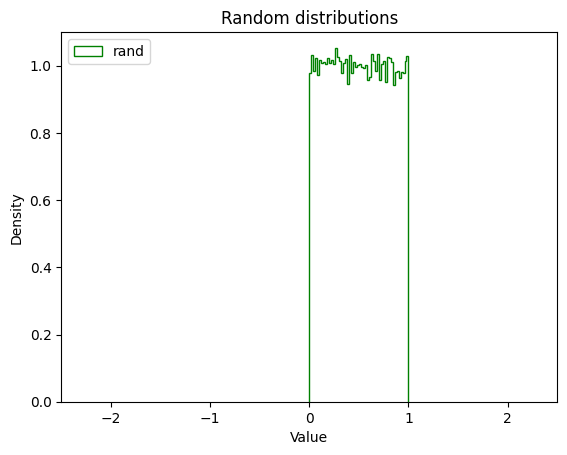

In [3]:
plt.hist(np.random.rand(100000), density=True, bins=50, histtype="step", color="green",
label="rand")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

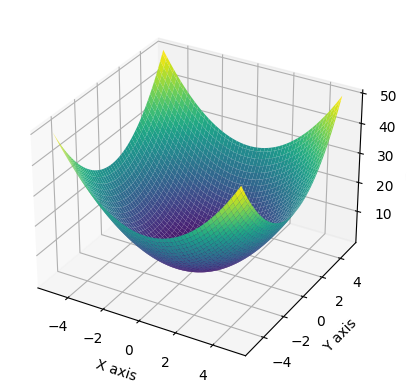

In [4]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

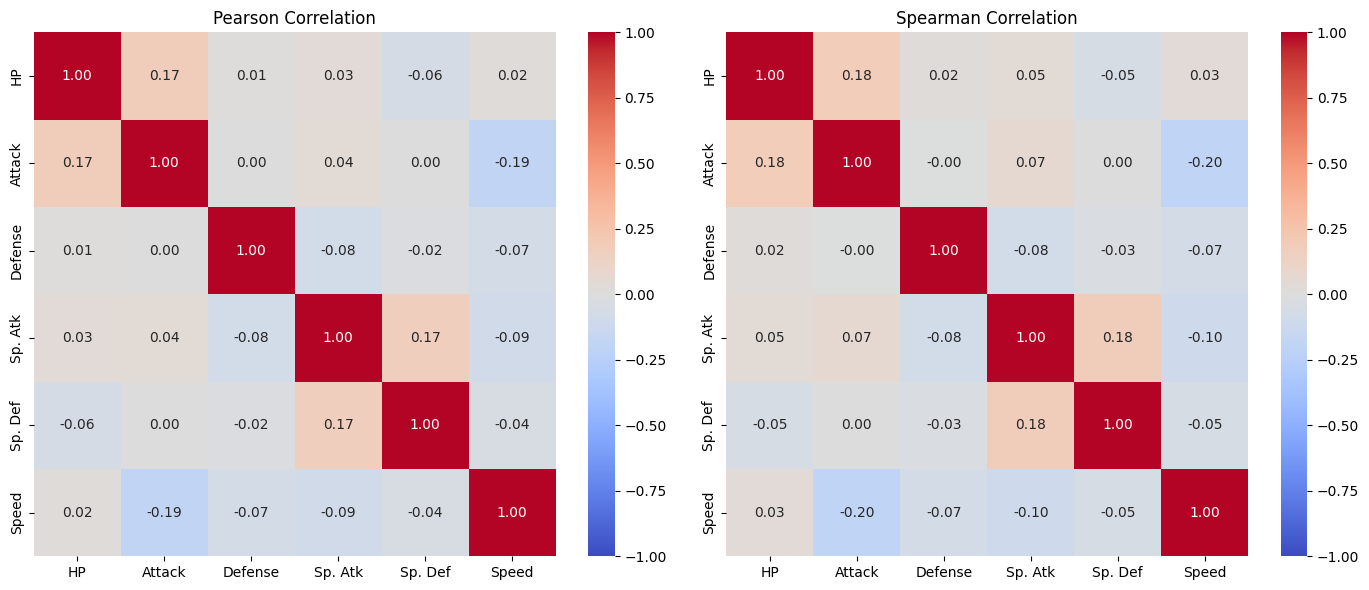

In [6]:
import seaborn as sns
import pandas as pd
from scipy.stats import spearmanr

# Simulate loading the dataset
data = {
    'HP': np.random.randint(50, 150, 100),
    'Attack': np.random.randint(50, 150, 100),
    'Defense': np.random.randint(50, 150, 100),
    'Sp. Atk': np.random.randint(50, 150, 100),
    'Sp. Def': np.random.randint(50, 150, 100),
    'Speed': np.random.randint(50, 150, 100)
}

df = pd.DataFrame(data)

# Calculate Pearson correlation matrix
pearson_corr = df.corr()

# Calculate Spearman correlation matrix
spearman_corr, _ = spearmanr(df)

# Convert Spearman correlation to DataFrame for heatmap
spearman_corr_df = pd.DataFrame(spearman_corr, index=df.columns, columns=df.columns)

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Heatmap for Pearson correlation
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

# Heatmap for Spearman correlation
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

plt.tight_layout()
plt.show()


In [15]:
# Load the CSV file into a dataframe
df = pd.read_csv('Au_nanoparticle_dataset.csv')

# List of columns to exclude
columns_to_exclude = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

# Create a new dataframe by excluding the specified columns
filtered_df = df.drop(columns=columns_to_exclude)

In [16]:
# Display the first few rows of the new dataframe
print(filtered_df.head(20))

    ID    T       tau  time        Volume    R_min    R_max   R_diff   R_std  \
0    1  273  0.000025     1  2.710000e-26  15.5898  19.4516   3.8618  0.6230   
1    2  273  0.000025     2  2.780000e-26  15.3996  24.1755   8.7760  0.9295   
2    3  273  0.000025     3  7.850000e-26  21.9199  31.0305   9.1106  1.0701   
3    4  273  0.000025     4  1.220000e-25  23.2542  37.8795  14.6253  2.3732   
4    5  273  0.000025     5  1.860000e-25  27.1200  39.7614  12.6415  1.9397   
5    6  273  0.000025     6  2.260000e-25  33.2496  42.9612   9.7116  1.0219   
6    7  273  0.000025     7  2.340000e-25  33.6164  41.6168   8.0004  0.8979   
7    8  273  0.000025     8  2.360000e-25  34.5185  41.4386   6.9201  0.8595   
8    9  273  0.000025     9  2.370000e-25  34.7525  41.5998   6.8473  0.8483   
9   10  273  0.000025    10  2.380000e-25  34.7870  41.5401   6.7531  0.8308   
10  11  273  0.000050     1  2.600000e-26  15.0408  18.6580   3.6172  0.6360   
11  12  273  0.000050     2  2.640000e-2

In [17]:
# Select the columns of interest
columns_of_interest = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
selected_df = df[columns_of_interest]

# Calculate the mean, standard deviation, and quartile values
statistics = selected_df.describe().loc[['mean', 'std', '25%', '50%', '75%']]

# Display the calculated statistics
print(statistics)

          N_total       N_bulk   N_surface      R_avg
mean  3476.786500  2521.550250   955.23625  20.654363
std   3679.286769  2976.232459   721.87022   7.610716
25%   1061.000000   618.750000   437.00000  15.160725
50%   1867.000000  1199.000000   666.00000  18.629250
75%   4503.000000  3183.000000  1301.75000  25.525125


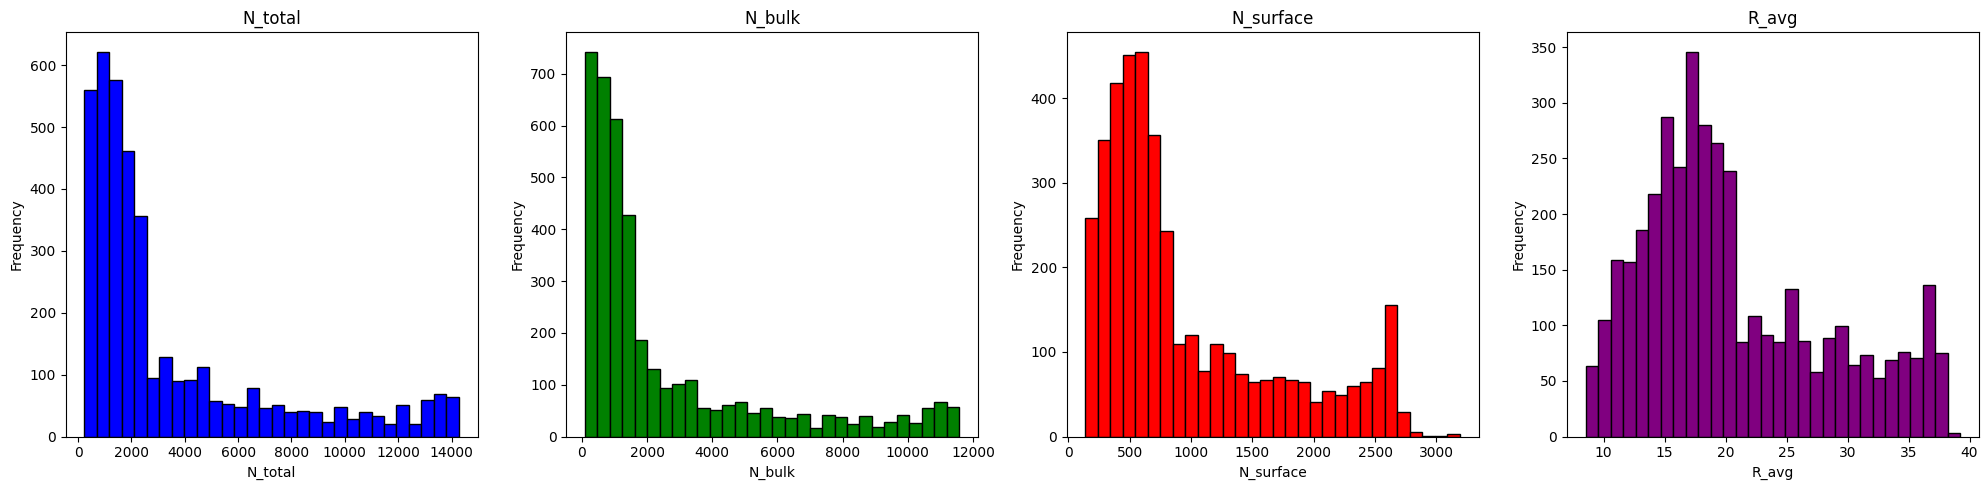

In [18]:
# Plot the histograms in a 1x4 layout
plt.figure(figsize=(20, 5))

# Histogram for N_total
plt.subplot(1, 4, 1)
plt.hist(selected_df['N_total'], bins=30, color='blue', edgecolor='black')
plt.title('N_total')
plt.xlabel('N_total')
plt.ylabel('Frequency')

# Histogram for N_bulk
plt.subplot(1, 4, 2)
plt.hist(selected_df['N_bulk'], bins=30, color='green', edgecolor='black')
plt.title('N_bulk')
plt.xlabel('N_bulk')
plt.ylabel('Frequency')

# Histogram for N_surface
plt.subplot(1, 4, 3)
plt.hist(selected_df['N_surface'], bins=30, color='red', edgecolor='black')
plt.title('N_surface')
plt.xlabel('N_surface')
plt.ylabel('Frequency')

# Histogram for R_avg
plt.subplot(1, 4, 4)
plt.hist(selected_df['R_avg'], bins=30, color='purple', edgecolor='black')
plt.title('R_avg')
plt.xlabel('R_avg')
plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

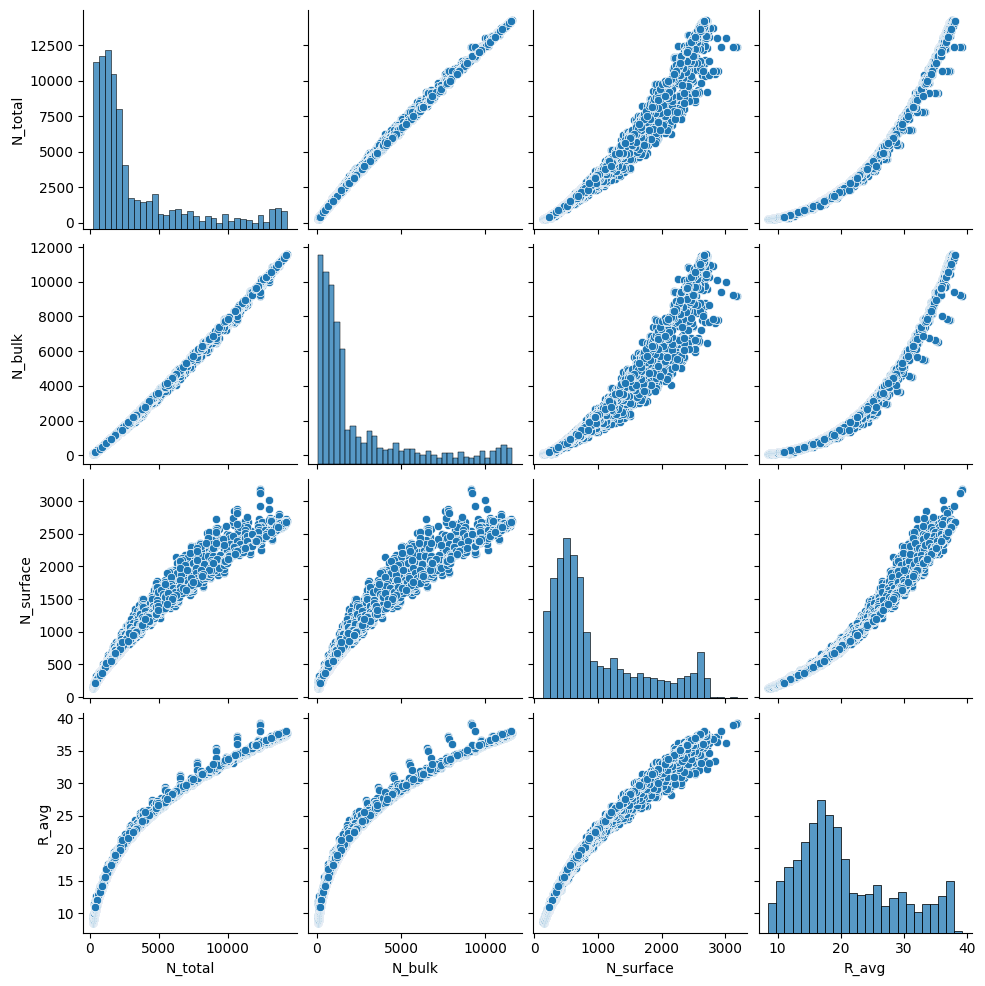

In [19]:
# Visualize the scatter plots and histograms using pairplot
sns.pairplot(selected_df)

# Display the plot
plt.show()

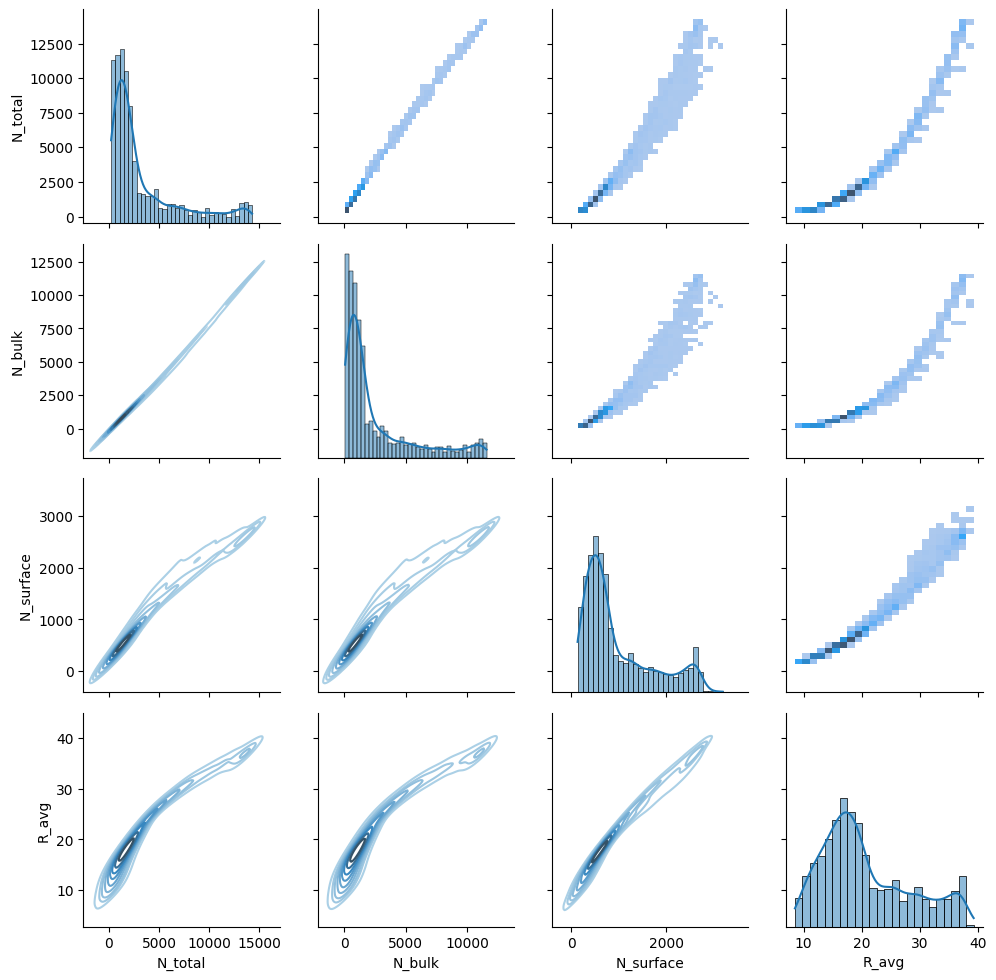

In [21]:
# Customize and plot the PairGrid
g = sns.PairGrid(selected_df)

# Upper half: bivariate histogram
g.map_upper(sns.histplot)

# Diagonal: histogram with kernel density estimation
g.map_diag(sns.histplot, kde=True)

# Lower half: bivariate kernel density estimation plot
g.map_lower(sns.kdeplot, cmap="Blues_d")

# Display the plot
plt.show()